In [1]:
import pandas as pd
import numpy as np

corona = pd.read_csv("../csv/corona.csv")

In [3]:
corona.drop(["Unnamed: 0"], axis = "columns", inplace = True)

In [4]:
corona.columns = ['등록일시', '사망자', '확진자', '게시글번호', '기준일', '기준시간', '수정일시', '누적의심자', '누적확진률']

In [5]:
corona.sort_values(["등록일시"],inplace = True)

In [6]:
corona.reset_index(drop=True, inplace=True)

In [7]:
corona["일일확진자"] = corona["확진자"].diff


In [9]:
corona["일일확진자"] = corona["확진자"] - corona["확진자"].shift()
corona["일일사망자"] = corona["사망자"].diff()
corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,NaN,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0


In [13]:
#결측치를 채우는 함수
# fillna(결측치에 들어갈 값)
corona["일일확진자"] = corona["일일확진자"].fillna(0)
corona

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN,12039.0,9.0
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN,9834.0,20.0
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN,5022.0,21.0
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,6172.0,20.0


In [16]:
#fillna(옵션)
## method 속성 --> ffill, bfill
## fill 채우다 라는 의미, f:front  / b:back
## ffill : 전의 값으로 채운다 
## bfill : 후의 값으로 채운다
## 누적의심자 컬럼의 값들을 fillna(method = 'bfill')

corona["누적의심자"].fillna(method = 'bfill')
corona["누적의심자"].fillna(method = 'ffill')
corona

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN,12039.0,9.0
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN,9834.0,20.0
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN,5022.0,21.0
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,6172.0,20.0


In [17]:
## 누적확진률에 결측치의 값을 누적확진률의 평균을 채운다. 
corona["누적확진률"].fillna(corona["누적확진률"].mean())

0      3.919308
1      3.804175
2      3.621744
3      3.458499
4      3.318000
         ...   
815    1.556435
816    1.556435
817    1.556435
818    1.556435
819    1.556435
Name: 누적확진률, Length: 820, dtype: float64

In [18]:
##filter 기능
## query()
corona.query("일일확진자 < 0") #확진자 - 나올수 없다

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0


In [20]:
# 인덱스 444부터 448까지의 데이터를 출력
corona.loc[444:448,:]

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
444,2021-05-29 00:00:00.000,1951,139427,496,20210529,00:00,2021-10-07 10:30:51.51,9733588.0,1.450884,533.0,5.0
445,2021-05-30 00:00:00.0,1959,140337,498,20210531,00:00,2021-10-14 13:48:56.821,9761156.0,1.456805,910.0,8.0
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0
447,2021-06-01 00:00:00.000,1963,140796,499,20210601,00:00,2021-10-07 10:30:51.51,9798400.0,1.455890,889.0,6.0
448,2021-06-02 00:00:00.000,1965,141473,500,20210602,00:00,2021-10-07 10:30:51.51,9834348.0,1.457668,677.0,2.0


In [27]:
#lambda 함수 파생변수
#일반 def 함수 파생변수
# 누적확진률 컬럼에서 누적확진률의평균 보다 높으면 High 낮으면 Low

corona["누적확진률"].fillna(corona["누적확진률"].mean(), inplace= True)
print(corona["누적확진률"].mean())

1.5564347660428568


In [29]:
## lambda 매개변수 : 표현식
corona["H/L"] = corona["누적확진률"].apply(lambda x : "High" if (x > corona["누적확진률"].mean()) else "Low")
corona["H/L"].value_counts()

Low     421
High    399
Name: H/L, dtype: int64

In [34]:
## apply() 일반함수
## 함수 생성 
## 매개변수 1개 매개변수 값이 누확진률의 평균보다 높으면 High return
## 조건식이 거짓이면 Low return

def HL(x):
    if x > corona["누적확진률"].mean():
        return "High"
    else: 
        return "Low"

corona["누적확진률"].apply(HL)

0      High
1      High
2      High
3      High
4      High
       ... 
815    High
816    High
817    High
818    High
819    High
Name: 누적확진률, Length: 820, dtype: object

In [35]:
## 요일이라는 파생변수 생성
## 등록일시 datetime 변경
## datetime 기준으로 요일을 출력

corona["등록일시"] = pd.to_datetime(corona["등록일시"])

In [57]:
## dt.weekday를 사용하면 요일이 숫자 표시
## 0-->월   6-->일 #dt.weekday쓰려면 datetime기준으로 변경이 필수
corona["요일"] = corona["등록일시"].dt.weekday
corona.head()


,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L,요일
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN,High,1
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High,2
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High,3
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High,4
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High,5


In [58]:
## apply 함수를 이용해서 숫자로 표시되어 있는 요일 컬럼을 
## 한글로 변경

def weekday(x):
    if x == 0:
        return "월요일"
    elif x == 1:
        return "화요일"
    elif x == 2:
        return "수요일"
    elif x == 3:
        return "목요일" 
    elif x == 4:
        return "금요일"
    elif x == 5:
        return "토요일"
    elif x == 6 :
        return "일요일"

corona["요일"] = corona["요일"].apply(weekday)
corona.head()


,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L,요일
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN,High,화요일
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High,수요일
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High,목요일
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High,금요일
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High,토요일


In [59]:
# 요일별 코로나의 확진자수의 평균이 어떻게 표시되는가
# 그래프를 이용해서 출력

week_corona = corona.groupby("요일").mean()
week_corona

,사망자,확진자,게시글번호,기준일,누적의심자,누적확진률,일일확진자,일일사망자
요일,,,,,,,,
금요일,3875.923077,1.874167e+06,470.940171,2.020893e+07,7.541537e+06,1.552697,22542.854701,32.897436
목요일,3873.922414,1.867492e+06,472.991379,2.020893e+07,7.576033e+06,1.555236,25776.267241,34.206897
수요일,3982.805085,1.964730e+06,472.627119,2.020895e+07,7.472065e+06,1.558039,26994.550847,28.152542
월요일,3978.267241,1.947711e+06,473.750000,2.020901e+07,7.594898e+06,1.554822,14862.586207,24.267241
일요일,3920.169492,1.902463e+06,473.161017,2.020903e+07,7.618305e+06,1.552289,20625.101695,28.262712
토요일,3908.427350,1.896723e+06,471.940171,2.020901e+07,7.575484e+06,1.550996,22555.948718,32.504274
화요일,3954.652542,1.937736e+06,471.364407,2.020895e+07,7.437156e+06,1.570840,21787.296610,27.000000


In [61]:
from matplotlib import font_manager, rc

In [62]:
import matplotlib.pyplot as plt

In [66]:
#인덱스랑 똑같이 리스트 형으로 
week_corona["일일확진자"].to_list()

[22542.8547008547,
 25776.26724137931,
 26994.550847457627,
 14862.586206896553,
 20625.101694915254,
 22555.94871794872,
 21787.29661016949]

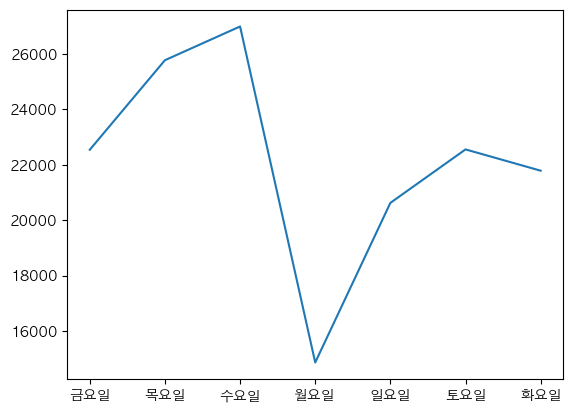

In [68]:
## x축의 값은 --> 요일 
## y축의 값은 --> 평균 확진자의 수

x = week_corona.index
y = week_corona["일일확진자"]


rc('font', family='AppleGothic') # 애플용
plt.rcParams['axes.unicode_minus'] = False #애플용


#file_path = "폰트경로"
#font = font_manager.FontProperties(fname = file_path).get_name()
#rc("font", family=font)

plt.plot(x,y)